In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
sys.path.append('../scripts/')
import create_dataset_utils as cdu
import paired_embeddings_models as pem
import data_vis_utils as dvu

Font size is set to 10


In [18]:
path_data_indices = '/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/data/EIDC UKBMS/bdffdd79-7744-4d48-9f4f-d77a3ab98573/data/ukbmssiteindices2022.csv'
path_site_locations = '/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/data/EIDC UKBMS/226979d4-6d81-4f5b-9bb7-4a430caa7f51/data/ukbmssitelocationdata2022.csv'

In [23]:
df_indices = pd.read_csv(path_data_indices)
df_locations = pd.read_csv(path_site_locations, sep=",", encoding='cp1252')

In [24]:
df_indices.head()

,SITE_CODE,COUNTRY,SPECIES_CODE,SPECIES,COMMON_NAME,YEAR,SITE_INDEX
0,1,England,84,Aglais io,Peacock,1976,21
1,1,England,84,Aglais io,Peacock,1977,7
2,1,England,84,Aglais io,Peacock,1978,7
3,1,England,84,Aglais io,Peacock,1979,30
4,1,England,84,Aglais io,Peacock,1980,41


In [31]:
n_sites = df_indices.SITE_CODE.nunique()
n_years = df_indices.YEAR.nunique()
n_species = df_indices.SPECIES_CODE.nunique()

n_combis = n_sites * n_years * n_species
print(f"There are {n_sites} sites, {n_years} years and {n_species} species, resulting in {n_combis} combinations")
print(f"Total number of records: {df_indices.shape[0]} (={df_indices.shape[0]/n_combis:.3f} fraction of all combinations)")


There are 4299 sites, 50 years and 60 species, resulting in 12897000 combinations
Total number of records: 727391 (=0.056 fraction of all combinations)


In [25]:
df_locations.head()

,Site_Number,Site_Name,Gridreference,Easting,Northing,Length,Country,N_sections,N_yrs_surveyed,First_year_surveyed,Last_year_surveyed,Survey_type
0,1,Woodwalton Farm,TL214817,521400,281700,2038.0,England,12.0,47,1976,2022,UKBMS
1,2,Bevill's Wood,TL203794,520300,279400,1532.0,England,10.0,44,1974,2017,UKBMS
2,3,Holkham,TF873453,587300,345300,3454.0,England,6.0,45,1976,2022,UKBMS
3,4,Monks Wood,TL198801,519800,280100,2900.0,England,14.0,50,1973,2022,UKBMS
4,5,Monks Wood Fields,TL200800,520000,280000,NaN,England,15.0,3,1974,1976,UKBMS


<Axes: >

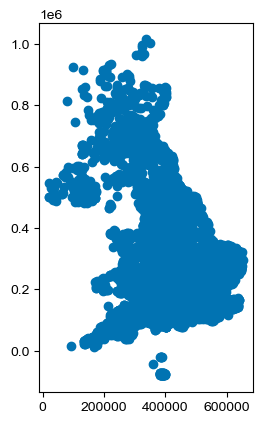

In [28]:
gdf_locations = gpd.GeoDataFrame(df_locations, geometry=gpd.points_from_xy(df_locations.Easting, df_locations.Northing))
gdf_locations.plot()

In [15]:
assert df_indices.SPECIES_CODE.nunique() == df_indices.SPECIES.nunique()
print(f'n species: {df_indices.SPECIES_CODE.nunique()}')
print(f'n sites: {df_indices.SITE_CODE.nunique()}')

n species: 60
n sites: 4299


In [17]:
np.sort(df_indices.SITE_INDEX.unique())

array([    -2,      0,      1, ..., 230652, 251961, 257446])